# 독버섯/식용버서 분류기
http://archive.ics.uci.edu/ml/datasets/Mushroom

## 데이터 설명
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Datasest/agaricus-lepiota.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 데이터 전처리

In [3]:
# 결측값 확인
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [4]:
for i in range(23):
    print(data[i].value_counts())

e    4208
p    3916
Name: 0, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: 1, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: 2, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: 3, dtype: int64
f    4748
t    3376
Name: 4, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: 5, dtype: int64
f    7914
a     210
Name: 6, dtype: int64
c    6812
w    1312
Name: 7, dtype: int64
b    5612
n    2512
Name: 8, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: 9, dtype: int64
t    4608
e    3516
Name: 10, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64
s    5176
k    2372
f     552
y      24
Name: 12, dtype: int64
s    4936
k    2304
f     600
y     284
Name: 13, dtype: int64
w    4464
p    1872
g     57

In [5]:
# 데이터 분리
y = data.iloc[:,0:1]
y = np.where(y=="p",1,0)
x = data.iloc[:,1:]

In [6]:
x.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## 상관관계

### 문자 => 숫자
- labelencoder
- onehotencoder

### labelencoder

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x_labelencoder = pd.DataFrame()
for column in x.columns:
    x_labelencoder[column] = labelencoder.fit_transform(x[column])
x_labelencoder

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [9]:
co_xL = x_labelencoder.corr()
co_xL.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
1,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
2,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
3,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
4,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
5,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610


### onehotencoder

In [11]:
x_onehot = pd.get_dummies(x)
x_onehot.head()

,1_b,1_c,1_f,1_k,1_s,1_x,2_f,2_g,2_s,2_y,...,21_s,21_v,21_y,22_d,22_g,22_l,22_m,22_p,22_u,22_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
co_xO = x_onehot.corr()
co_xO.head()

,1_b,1_c,1_f,1_k,1_s,1_x,2_f,2_g,2_s,2_y,...,21_s,21_v,21_y,22_d,22_g,22_l,22_m,22_p,22_u,22_w
1_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
1_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
1_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
1_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
1_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,-0.026791,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784


## 시각화

### labelencoder heatmap

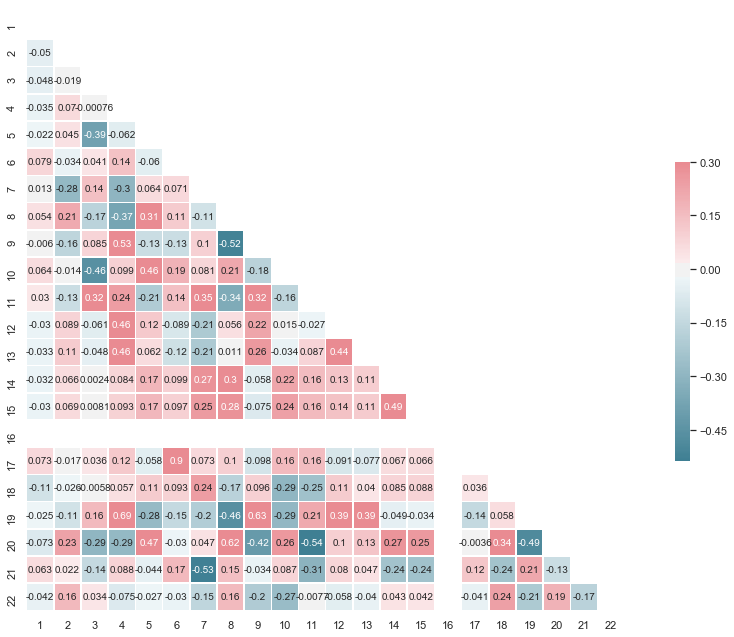

In [15]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(co_xL, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(co_xL, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True, annot_kws={"size": 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# 17 6 : 0.9
# 19 4 :0.69
# 20 8 : 0.62
# 9 19 : 0.63

### onehotencoder heatmap

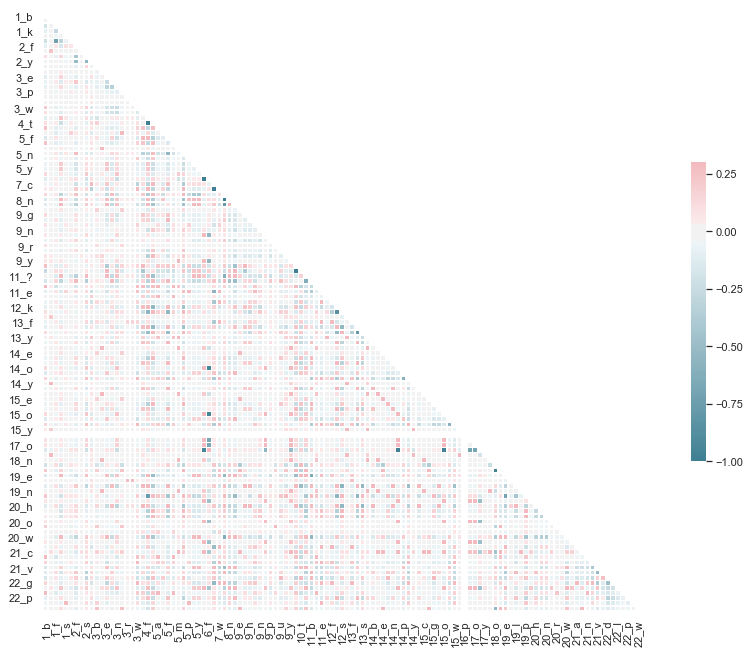

In [17]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(co_xO, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(co_xO, mask=mask, cmap=cmap, vmax=.3, center=0,#annot=True, annot_kws={"size": 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data split

In [20]:
# 16은 데이터 값이 모두 같음으로 제거
x_labelencoder.drop(16,axis=1,inplace=True)
x_onehot.drop('16_p',axis=1,inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

seed = 42
xL_train, xL_test, yL_train, yL_test = train_test_split(x_labelencoder,y, test_size=0.3, random_state=seed)
xO_train, xO_test, yO_train, yO_test = train_test_split(x_onehot,y, test_size=0.3, random_state=seed)

In [22]:
print(xL_train.shape, xL_test.shape, yL_train.shape, yL_test.shape)
print(xO_train.shape, xO_test.shape, yO_train.shape, yO_test.shape)

(5686, 21) (2438, 21) (5686, 1) (2438, 1)
(5686, 116) (2438, 116) (5686, 1) (2438, 1)


## 방법1 -  logistic

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
# labelencoder
model.fit(xL_train,yL_train.reshape(-1,1))
pred = model.predict(xL_test)
print('예측률 : ',(pred == yL_test.reshape(-1)).sum()/pred.shape[0])

예측률 :  0.9491386382280558


C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# onehot
model = LogisticRegression()
model.fit(xO_train,yO_train.reshape(-1,1))
pred = model.predict(xO_test)
print('예측률 : ',(pred == yO_test.reshape(-1)).sum()/pred.shape[0])

예측률 :  1.0


C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 직접 구현

In [51]:
w = tf.Variable(tf.random_normal([116,1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape=[None, 116])
y = tf.placeholder(tf.float32, shape=[None, 1])

hf = tf.sigmoid(tf.matmul(x,w) + b)
cost = -tf.reduce_mean( y*tf.log(hf) + (1-y)*(tf.log(1-hf)) )

In [52]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
prediction = tf.cast(hf > 0.5, dtype= tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y),dtype=tf.float32))

In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1,20001):
        _,cv = sess.run([train, cost], feed_dict={x:xO_train,y:yO_train.reshape(-1,1)})
        if step%2000==0:
            print(step,"번째 : ",cv)
            
    hv,av = sess.run([hf,accuracy],feed_dict={x:xO_test,y:yO_test.reshape(-1,1)})
    print("예측률 : ",av)

2000 번째 :  0.29778218
4000 번째 :  0.15233666
6000 번째 :  0.10742458
8000 번째 :  0.08488252
10000 번째 :  0.07080396
12000 번째 :  0.061043866
14000 번째 :  0.05385881
16000 번째 :  0.048345968
18000 번째 :  0.04397957
20000 번째 :  0.04043072
예측률 :  0.9897457


In [117]:
# # label에서 안되네....왜지.... 스케일링 해야지 되려나
# w = tf.Variable(tf.random_normal([21,1]))
# b = tf.Variable(tf.random_normal([1]))
# x = tf.placeholder(tf.float32, shape=[None, 21])
# y = tf.placeholder(tf.float32, shape=[None, 1])

# hf = tf.sigmoid(tf.matmul(x,w) + b)
# cost = -tf.reduce_mean( y*tf.log(hf) + (1-y)*(tf.log(1-hf)) )

# train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# prediction = tf.cast(hf > 0.5, dtype= tf.float32)
# accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y),dtype=tf.float32))

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for step in range(1,20001):
#         _,cv = sess.run([train, cost], feed_dict={x:xL_train,y:yL_train.reshape(-1,1)})
#         if step%500==0:
#             print(step,"번째 : ",cv)
            
#     hv,av = sess.run([hf,accuracy],feed_dict={x:xL_test,y:yL_test.reshape(-1,1)})
#     print("예측률 : ",av)

## 방법2 - KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#onehot
model = KNeighborsClassifier(n_neighbors=50)
model.fit(xO_train, yO_train)
print("train예측률 : ",model.score(xO_train, yO_train))

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train예측률 :  0.9978895532887795


In [59]:
pred = model.predict(xO_test)
print('예측률 : ',(pred == yO_test.reshape(-1)).sum()/pred.shape[0])

예측률 :  0.9983593109105825


In [60]:
# labelencoder
model = KNeighborsClassifier(n_neighbors=10)
model.fit(xL_train, yL_train)
print("train예측률 : ",model.score(xL_train, yL_train))

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train예측률 :  0.9956032360182905


In [61]:
pred = model.predict(xL_test)
print('예측률 : ',(pred == yL_test.reshape(-1)).sum()/pred.shape[0])

예측률 :  0.9934372436423298


### 직접 구현

In [ ]:
# 가까운 20개의 비율을 구한 다음
# 기준값으로 1과 0으로 치환하여 정확도 보기

In [63]:
yO_train = pd.DataFrame(yO_train,index=xO_train.index)
yO_test = pd.DataFrame(yO_test,index=xO_test.index)

In [64]:
xO_train = xO_train.astype('int')
xO_test = xO_test.astype('int')

In [71]:
def knn(df_x,df_y,n):
    res=[]
    for i in range(df_x.shape[0]):
        x = df_x - df_x.iloc[i,:]
        x =pd.DataFrame(((x**2).sum(axis=1))**(1/2))
        index = x.sort_values(by=0)[:n].index

        # 상위 n개
        res.append((df_y.loc[list(index),:].sum()/n)[0]) # 1일 확률
        
    
    res = np.where(np.array(res)>0.6,1,0)
    return (res==df_y[0]).sum()/len(res)

In [72]:
print("onehot train 예측률 : ",knn(xO_train,yO_train,20))
print("onehot test 예측률 : ",knn(xO_test,yO_test,20))

onehot train 예측률 :  0.9982412944073162
onehot test 예측률 :  0.9983593109105825
